## В какие компьютерные игры стоит вкладываться?

### Оглавление
1. Знакомство с данными
2. Подготовка данных
3. Исследование данных
4. Проверка гипотез
5. Общий вывод

### 1.Знакомство с данными

<a id='section3.1'></a>

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('F:/DS/Projects/games.csv')

In [3]:
df.shape

(16715, 11)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
#Для удобного обращения переведем названия столбцов в нижний регистр
df.set_axis(df.columns.str.lower(), axis = 'columns', inplace = True)

In [7]:
#Посмотрим, какие значения встречаются в каждом столбце, за исключением тех, в которых очень много уникальных занчений
columns = ['platform', 'year_of_release', 'genre', 'rating']
for i in columns:
    display(i)
    display(df[i].unique())

'platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'year_of_release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
#Создадим сводную табличку по количеству, доле пропусков в признаках с указанием типа данных
total = df.isnull().sum()
percent = ((df.isnull().sum()/df.isnull().count())*100).round(2)
missing = pd.concat([total, percent], axis = 1, keys = ['Total_missing_values', 'Percent%'])
missing['dtype'] = df.dtypes
missing

,Total_missing_values,Percent%,dtype
name,2,0.01,object
platform,0,0.00,object
year_of_release,269,1.61,float64
genre,2,0.01,object
na_sales,0,0.00,float64
eu_sales,0,0.00,float64
jp_sales,0,0.00,float64
other_sales,0,0.00,float64
critic_score,8578,51.32,float64
user_score,6701,40.09,object


In [9]:
#Посмотрим, почему у столбца user_score тип данных object (что-то здесь не так)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#Посмотрим, повторяются ли игры
a = df.groupby(by = 'name')[['genre']].count().sort_values(by = 'genre', ascending = False)
a.query('genre > 1')

,genre
name,
Need for Speed: Most Wanted,12
LEGO Marvel Super Heroes,9
Ratatouille,9
Madden NFL 07,9
FIFA 14,9
...,...
SingStar Abba,2
Mario & Sonic at the London 2012 Olympic Games,2
CyberTiger,2


Значит, одна игра нередко выходит на разных платформах.

In [11]:
#Посмотрим, как ведут себя данные в рамках 1 игры
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Значит, одна игра может выходить на 1 платформе в разные года, видимо, в разных релизах.

#### Итог по разделу:
Есть значимые пропуски в данных (**сritic_score, user_score, rating**) - большой % отсуствующих данных

Среднезначимые пропуски (**year_of_release**) - процент небольшой, но даные важные

И незначимые (**name, genre**) - небольшой процент отсутствующих данных

Есть ошибки в типах данных:
- **year_of_release** (можно не мудрить с форматом даты - для нашего исследования вполне подойдет int)
- **critic_score** (можно перевести в целый - нагляднее в работе, меньше места)
- **user_score** (нужен числовой формат для вычислений, сразу видим, что текстовое значение tbd несколько портит картину)

### 2. Подготовка данных

Сразу удалим строки с неизвестным названием игры. Название здесь - ключевой id.
Кроме того, таких записей всего 2, это ничтожный процент от всех данных (одна сотая процента)

In [12]:
df.dropna(subset = ['name'], inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Как видим, одновременно дропнулись и пропущенные жанры. Ну и хорошо. Двух зайцев одним выстрелом.

Пропущенные годы выпуска заполним первым годом выпуска этой игры (на других платформах)

In [14]:
for i in df[df.year_of_release.isnull() == True].index:  
    df.year_of_release[i] = df.loc[df.name == df.name[i], 'year_of_release'].min()

Посмотрим, на сколько уменьшилось количество пропущенных годов.

In [15]:
((df['year_of_release'].isna().sum()/len(df['year_of_release']))*100).round(2)

0.87

Снизили процент пропущенных годов с 1,61 до 0,87.

Выясним, почему отсуствуют оценки критиков и юзеров - мб это 2016 год, данные просто не успели подтянуться?

In [16]:
df[df['critic_score'].isna() == True]['year_of_release'].unique()

array([1985., 1996., 1989., 1984., 2005., 1999., 1990., 2006., 1988.,
       2002., 2010., 1998., 2015., 2013., 2009., 2014., 1992., 1993.,
       2004., 1994., 1997., 2012., 2007., 1982., 2016., 2003., 2011.,
       1986., 2000., 2001., 1995., 2008., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [17]:
df[df['user_score'].isna() == True]['year_of_release'].unique()

array([1985., 1996., 1989., 1984., 2005., 1999., 1990., 2006., 1988.,
       2002., 2010., 1998., 2015., 2013., 2009., 2014., 1992., 1993.,
       2004., 1994., 1997., 2012., 2007., 1982., 2016., 2003., 2011.,
       1986., 2000., 2001., 1995., 2008., 1991., 1981., 1987., 1980.,
       1983.,   nan])

Нет, увы. Оценки пропущены не только по 2016 году.\
Мб данных нет по конкретным платформам?

In [18]:
df[df['critic_score'].isna() == True]['platform'].unique()

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
df[df['user_score'].isna() == True]['platform'].unique()

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Нет, увы - данные отсуствуют по многим  платформам.\
Тогда можно заполнить пропущенные значения средней оценкой по конкрентной игре (на разных платформах).\
Но сначала проверим, не сильно ли средние оченки критиков разных платформ отличаются друг от друга

Text(0.5, 1.0, 'Средние оценки критиков по платформам')

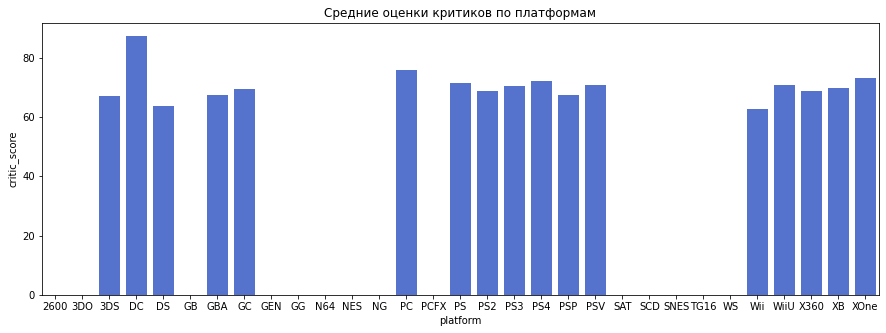

In [20]:
platform_critic_score = df.groupby('platform')['critic_score'].mean()
plt.figure(figsize=(15, 5))
sns.barplot(x="platform", y="critic_score", data = platform_critic_score.reset_index(), color = 'royalblue')
plt.title('Средние оценки критиков по платформам')

In [21]:
platform_critic_score.describe()

count    17.000000
mean     70.429453
std       5.411185
min      62.823932
25%      67.424242
50%      69.859310
75%      71.515000
max      87.357143
Name: critic_score, dtype: float64

В общем, средние похожи. Стандартное отклонение невелико. Заменим средним.\
До заполнения отсуствовало вот такое количество значений:

In [22]:
df['critic_score'].isna().sum()

8576

In [23]:
mean_score = df.groupby('name')['critic_score'].mean().to_dict()

def filler(row):
    if np.isnan(row['critic_score']):
        return mean_score.get(row['name'])
    return row['critic_score']

df['critic_score'] = df.apply(filler, axis = 1)

А после заполнения вот такое:

In [24]:
df['critic_score'].isna().sum()

7615

Неплохо. Заполнили почти тысячу значений.

В столбце **user_score** есть значение tbd.
В [сети](https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie) пишут, что:
> Эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода".

Здесь, это, видимо, означает просто, что рейтинг не определен.\
Но на всякий случай проверим год tbd

In [25]:
df.query('user_score == "tbd"')['year_of_release'].unique()

array([2010., 2005., 2011.,   nan, 2009., 2004., 1999., 2001., 2008.,
       2007., 2003., 2000., 2006., 2002., 1997., 2015., 2014., 2012.,
       2013., 2016.])

Да, от года наличие tbd не зависит. Значит, рейтинги просто не заполнены.\
Поменяем их на Nan.

In [26]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

Далее заполним пропуски в оценке пользователей по тому же принципу, как заполняли оценки критиков.

Text(0.5, 1.0, 'Средние оценки юзеров по платформам')

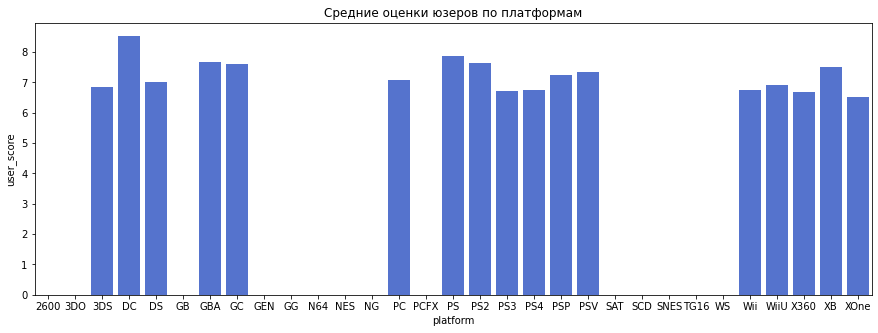

In [27]:
platform_user_score = df.groupby('platform')['user_score'].mean()
plt.figure(figsize=(15, 5))
sns.barplot(x="platform", y="user_score", data = platform_user_score.reset_index(), color = 'royalblue')
plt.title('Средние оценки юзеров по платформам')

In [28]:
platform_user_score.describe()

count    17.000000
mean      7.212125
std       0.531512
min       6.521429
25%       6.748249
50%       7.062468
75%       7.597541
max       8.528571
Name: user_score, dtype: float64

Количество пропусков до заполнения.

In [29]:
df['user_score'].isna().sum()

9123

In [30]:
mean_score = df.groupby('name')['user_score'].mean().to_dict()

def filler(row):
    if np.isnan(row['user_score']):
        return mean_score.get(row['name'])
    return row['user_score']

df['user_score'] = df.apply(filler, axis = 1)

Количество пропусков после заполнения.

In [31]:
df['user_score'].isna().sum()

8024

Заполнили около 1000 пропущенных значений.

Заменим типы данных и добавим в таблицу общую сумму продаж по всем регионам.

In [32]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].round(0).astype('float32').astype('Int64')

In [33]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [34]:
#Подведем итог проделанной работы
total = df.isnull().sum()
percent = ((df.isnull().sum()/df.isnull().count())*100).round(2)
missing = pd.concat([total, percent], axis = 1, keys = ['Total_missing_values', 'Percent%'])
missing['dtype'] = df.dtypes
missing

,Total_missing_values,Percent%,dtype
name,0,0.00,object
platform,0,0.00,object
year_of_release,146,0.87,Int64
genre,0,0.00,object
na_sales,0,0.00,float64
eu_sales,0,0.00,float64
jp_sales,0,0.00,float64
other_sales,0,0.00,float64
critic_score,7615,45.56,Int64
user_score,8024,48.01,float64


Доля отсуствующих значений по году релиза очень мала. Можно удалить эти записи из исследования

In [35]:
df.dropna(subset = ['year_of_release'], inplace = True)

Процент отсутствующих данных по оценкам пользователей и критиков остался довольно большим.\
Проверим, как это отразится на нашем исследовании.\
Посмотрим, как продаются игры, по которым нет оценки критиков.

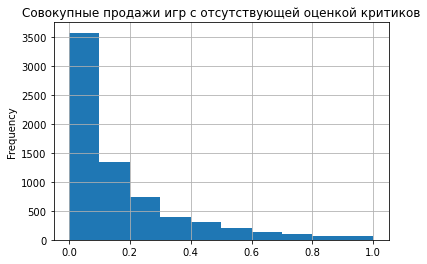

In [36]:
df.query('critic_score.isna() == True')['total_sales'].plot(kind = 'hist', range = (0,1), grid = True,
                                                            title = 'Совокупные продажи игр с отсутствующей оценкой критиков')

Посмотрим, как продаются игры, по которым нет оценки пользователей.

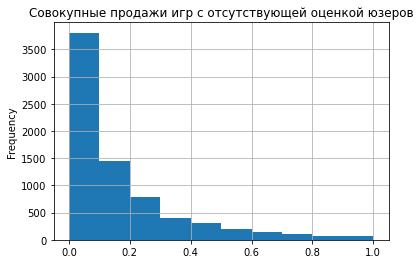

In [37]:
df.query('user_score.isna() == True')['total_sales'].plot(kind = 'hist', range = (0,1), grid = True,
                                                          title = 'Совокупные продажи игр с отсутствующей оценкой юзеров')

Посмотрим, как продаются игры, по которым нет рейтинга.

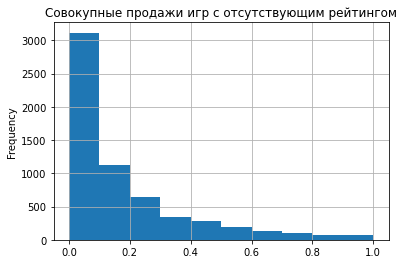

In [38]:
df.query('rating.isna() == True')['total_sales'].plot(kind = 'hist', range = (0,1), grid = True,
                                                          title = 'Совокупные продажи игр с отсутствующим рейтингом')

По распределению видно, эти игры чаще всего продаются слабо. И  это хорошо, потому что цель исследования - выявить потенциально популярный продукт. А эти игры к нему не относятся.

#### Итог по разделу:
Мы поменяли тип данных на нужный, максимально заполнили пропуски.\
А еще выяснили, что пропущенные значения в оценке пользователей, критиков, а также в рейтинге принадлежат играм с низкими продажами, значит, эти пропуски не сильно отразятся на нашем исследовании.

### 3.Исследование данных

#### Посмотрим, сколько игр выпускалось в разные годы. Все ли периоды важны для анализа?

Text(0.5, 1.0, 'Количество выпущенных игр в разные годы')

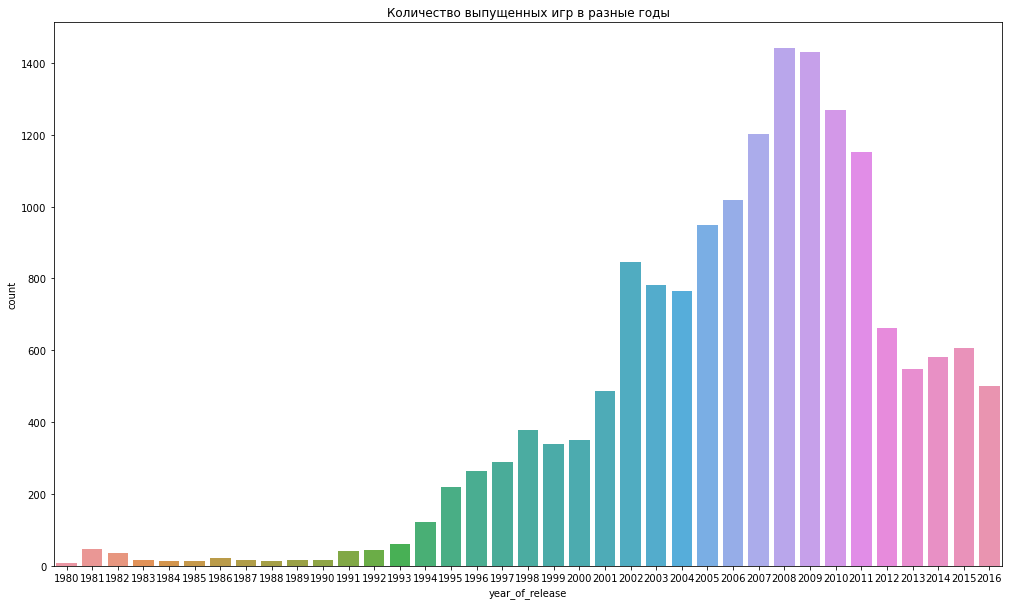

In [39]:
plt.figure(figsize=(17, 10))
ax = sns.countplot(x="year_of_release", data = df)
plt.title('Количество выпущенных игр в разные годы')

In [40]:
#Уберем 1980-2000 из исследования
df = df.query('year_of_release > 2000')

Видим, что с 1980 по 2000 выпускалось гораздо меньше игр, чем в последующие годы. Поэтому период 1980-2000 не так важен при исследованиях.

Text(0.5, 1.0, 'Количество выпущенных игр в разные годы')

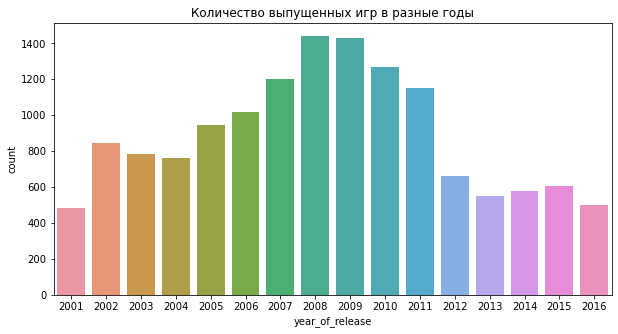

In [41]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="year_of_release", data = df)
plt.title('Количество выпущенных игр в разные годы')

#### Посмотрим, как меняются продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Выберем топ-10 платформ по суммарным продажам

In [42]:
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',
                                                                                        ascending = False).head(10)

,total_sales
platform,
PS2,1207.04
X360,966.61
PS3,934.71
Wii,903.31
DS,804.26
PS4,314.14
GBA,313.66
PSP,293.57
3DS,258.51


Сумма продажи резко снижается на топ-6, остановимся на топ-5

In [43]:
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',
                                                                                        ascending = False).head(5)

,total_sales
platform,
PS2,1207.04
X360,966.61
PS3,934.71
Wii,903.31
DS,804.26


Построим для этих платформ столбчатые диаграммы для визуальной оценки жизненного цикла платформы.

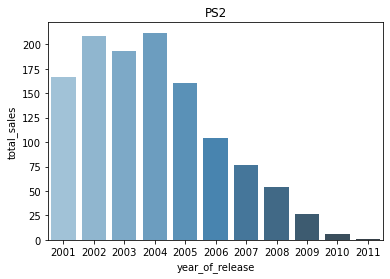

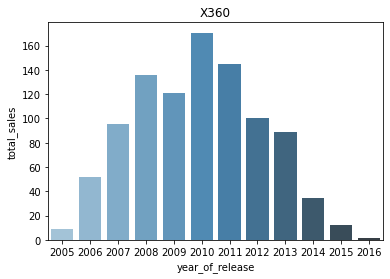

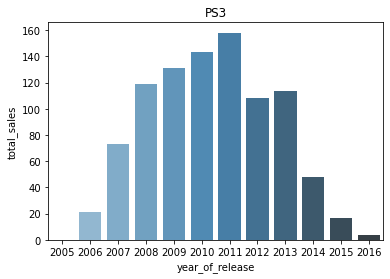

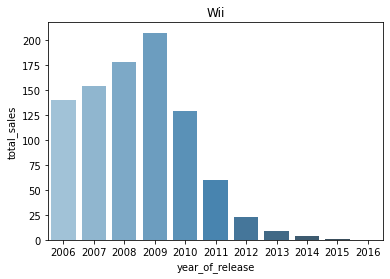

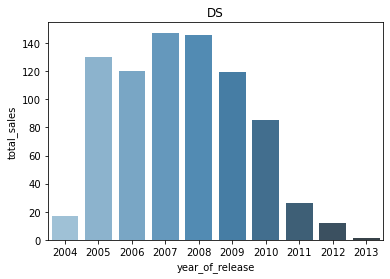

In [44]:
list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for i in list:
    sns.barplot(x="year_of_release", y="total_sales", data = df[df['platform'] == i].pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').reset_index(), palette="Blues_d")
    plt.title(i)
    plt.show()

Видим, что характерный срок возникновения и исчезновения платформы 10 лет.\
Также видно, что жизненный цифл платформы последние годы, как правило, таков:
- 1-2 год - вывод на рынок
- 2-7 годы - рост и зрелость
- далее упадок

#### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Выясним, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Мы выяснили, что характерные годы прибыльности платформы 2-7. Чтобы выявить потенциал прибыльности в платформах отмотаем назад  от 2017 назад 7 года: с 2010.\
И исcледуем этот период.

Выделим уникальные платформы, оставшиеся на рынке после 2010 и визуализируем продажи по ним с 2010 года.

In [45]:
df2010 = df.query('year_of_release >= 2010')
list = df2010['platform'].unique().tolist()

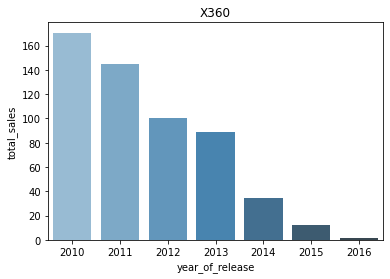

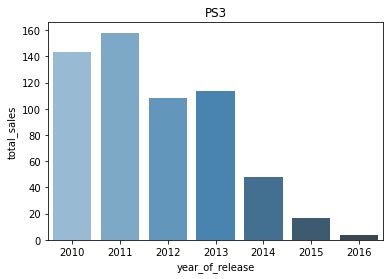

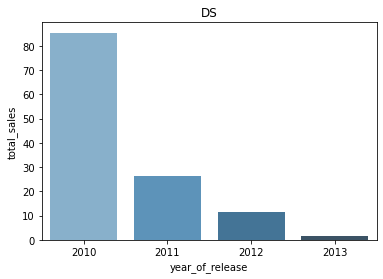

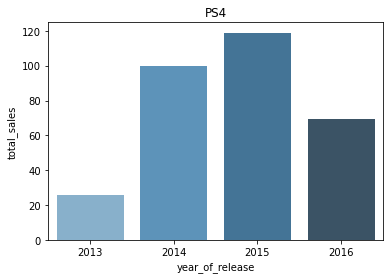

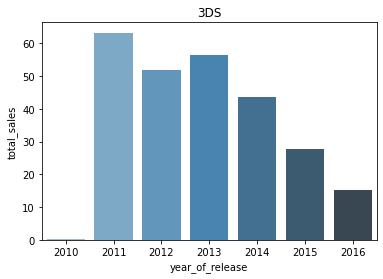

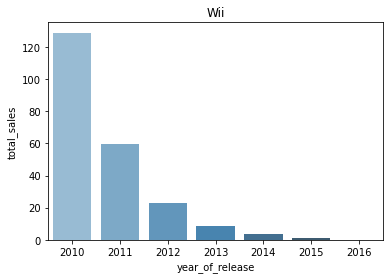

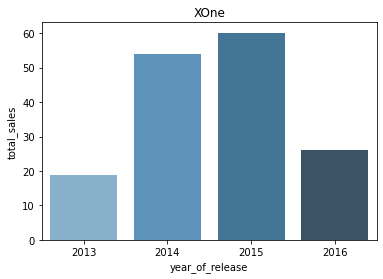

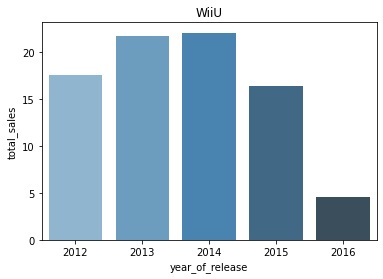

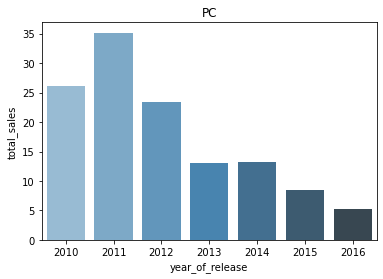

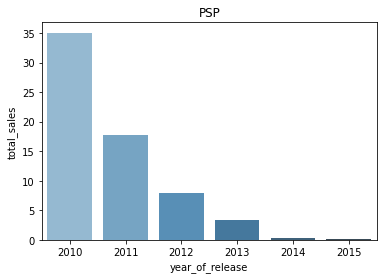

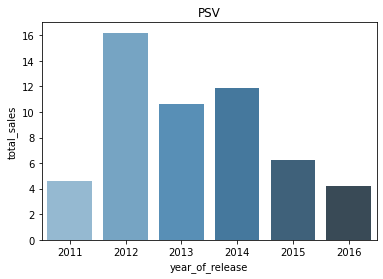

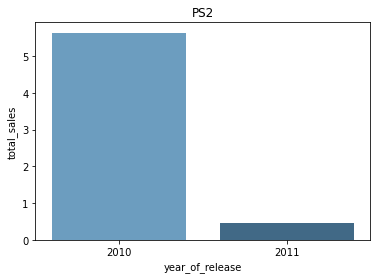

In [46]:
for i in list:
    sns.barplot(x="year_of_release", y="total_sales", data = df2010[df2010['platform'] == i].pivot_table(
    index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').reset_index(), palette="Blues_d")
    plt.title(i)
    plt.show()

Ни одна из платформ не находится на этапе роста.\
Перспективно прибыльными (но уже на стадии стагнации) можно считать:
- **PS4**
- **3DS**
- **XOne**
- **WiiU**
- PSV

А теперь перейдем к более свежим периодам, чтобы изучить текущую ситуацию на рынке. Возьмем 3 последние года.

In [47]:
df2014 = df.query('year_of_release >= 2014')

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [48]:
df2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


Text(0.5, 1.0, 'Продажи игр в разбивке по платформам')

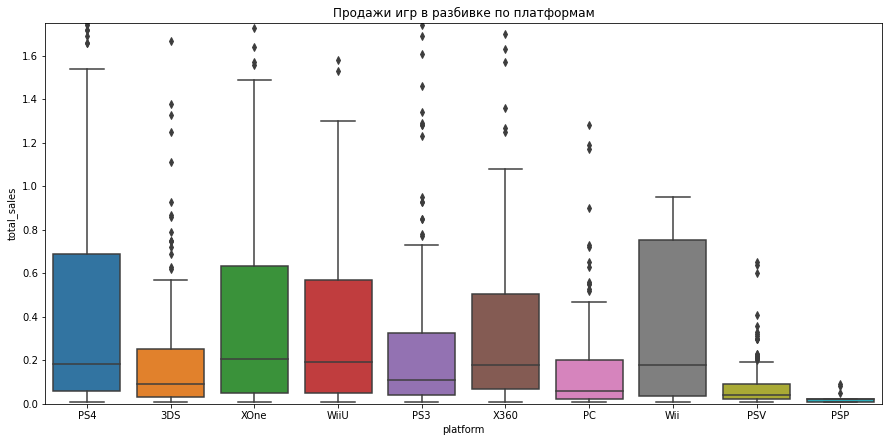

In [49]:
#На боксплоте было много выбросов, установили верхний предел для total_sales в 1.75
plt.figure(figsize=(15, 7))
sns.boxplot(x="platform", y="total_sales", data=df2014)
plt.ylim(0,1.75)
plt.title('Продажи игр в разбивке по платформам')

Видим, что самые большие продажи с 2014 года у платформ PS4, 3DS, XOne, WiiU, PS3, X360, Wii.\
Но, судя по предыдущим графикам, срок жизни X360, PS3, Wii уже истекает.\
Рекомендуем клиенту **PS4, 3DS, XOne, WiiU** как потенциально прибыльные и популярные.\
Таже отметим, что у всех платформ рапределение смещено вправо(верхний ус длиннее). Это значит, что средняя продажа занижена. Есть много продаж выше среднего.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Выясним, какая платформа самая популярная.\
Популярность оценим как количество игр, вышедших на той или иной платформе.

In [50]:
df2014_pivot_table = df2014.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'count').sort_values(
    by = 'total_sales', ascending = False)
df2014_pivot_table.rename(columns={'total_sales': 'number_of_games'})

,number_of_games
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


Изучим **PS4**

Построим матрицу рассеяния для платформы PS4 с 2014 года

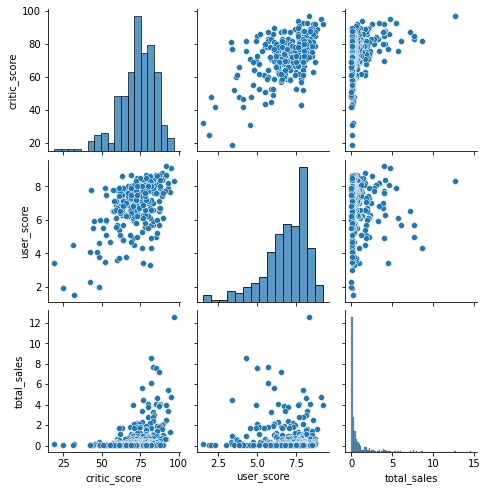

In [51]:
sns.pairplot(df2014.query('platform == "PS4"'), vars = ['critic_score', 'user_score', 'total_sales'], height = 2.3)

На диаграмме мы видим, что продажи зависят от оценки критиков. Чем лучше оценка, тем выше продажи.\
Причем, чем выше оценка, тем сильнее оная влияет на продажи.\
Также на диаграмме мы видим, что продажи зависят  оценки пользователей - чем лучше, тем выше. Хотя тут зависимость менее явная.\
Заметно также, что оценка критиков часто совпадает с оценкой пользователей.

#### Соотнесем выводы с продажами игр на других платформах.

Проделаем те же операции по массиву всех остальных платформ

Построим матрицу рассеяния для платформ кроме PS4 с 2014 года

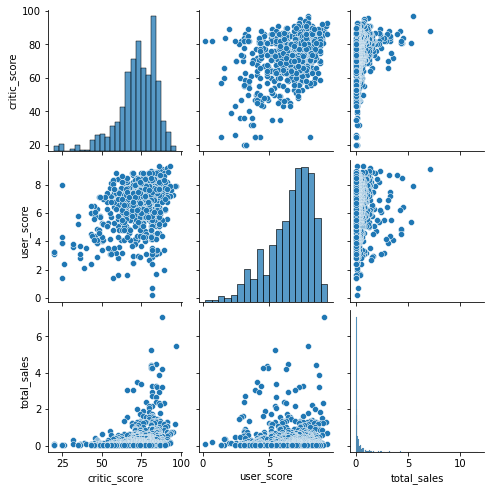

In [52]:
sns.pairplot(df2014.query('platform != "PS4"'), vars = ['critic_score', 'user_score', 'total_sales'], height = 2.3)

Видим ту же картину, что и с PS4.

#### Посмотрим на общее распределение игр по жанрам. Ответим на вопросы: что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Как продажи зависят от жанра')

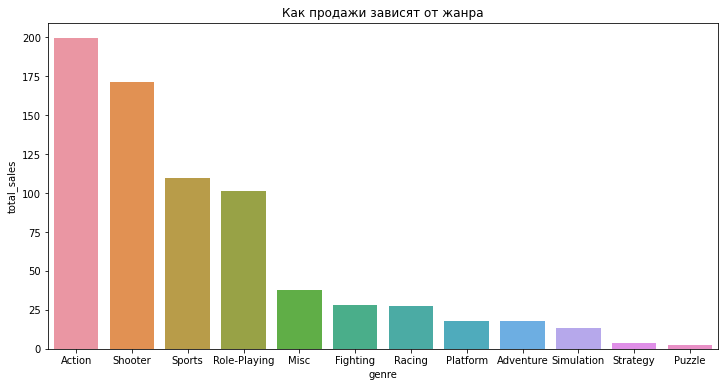

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x="genre", y="total_sales", data = df2014.pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = 'sum').reset_index().sort_values(by = 'total_sales',
                                                                                       ascending = False))
plt.title('Как продажи зависят от жанра')

Самый прибыльный жанр - экшн.\
На 2 месте - стрелялки.\
3 место делят ролевые и спорт.\
Стретегии и паззлы в хвосте. За стратегии особенно обидно.

Построим боксплоты, чтобы проверить, сколько в среднем выручки приносит игра каждого жанра.
Мб некоторые жанры берут количеством.

Text(0.5, 1.0, 'Продажи игр в разбивке по жанрам')

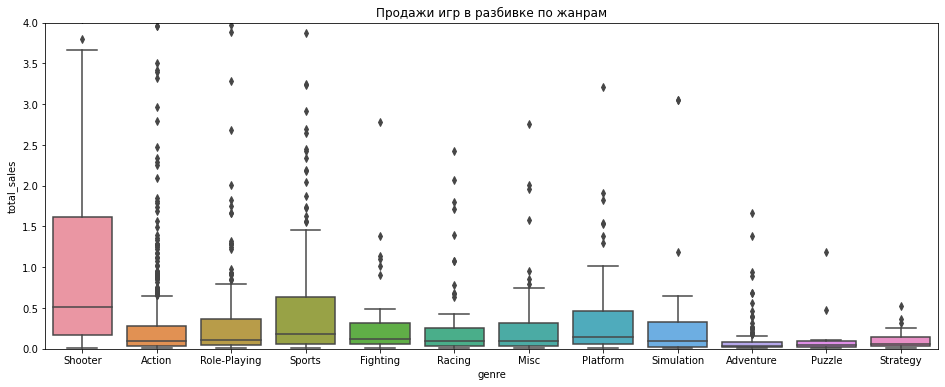

In [54]:
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'genre', y = 'total_sales', data = df2014)
plt.ylim(0, 4)
plt.title('Продажи игр в разбивке по жанрам')

Да, так и есть - на боксплотах видно, что некоторые жанры берут количеством игр.\
Так как диапазон колебания средней выручки в таких случаях невысок.\
По средней продаже самый прибыльный жанр - стрелялки. На втором месте - спорт, а на третьем - платформеры.

<a id='section5.1'></a>
#### Нарисуем портрет пользователя каждого региона (NA, EU, JP)

- самые популярные платформы (топ-5). Опишем различия в долях продаж.
- самые популярные жанры (топ-5). Поясним разницу.
- ответим на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе?

Выделим топ-5 самых популярных платформ в каждом регионе.\
Популярность будем оценивать по сумме продаж.

In [55]:
list = ['na_sales', 'eu_sales', 'jp_sales']
for i in list:
    table = df2014.pivot_table(index = 'platform', values = i, aggfunc = 'sum').sort_values(
    by = i, ascending = False)
    table['percent%'] = (table[i] / (table[i].sum()) * 100).round(0).astype('int')
    display(table.head(5))

,na_sales,percent%
platform,,
PS4,98.61,35
XOne,81.27,29
X360,28.30,10
3DS,22.64,8
PS3,22.05,8


,eu_sales,percent%
platform,,
PS4,130.04,48
XOne,46.25,17
PS3,25.54,9
PC,17.97,7
3DS,16.12,6


,jp_sales,percent%
platform,,
3DS,44.24,48
PS4,15.02,16
PSV,14.54,16
PS3,11.22,12
WiiU,7.31,8


В разных регионах популярностью пользуются разные платформы.\
Европа и Америка похожи по набору топ-платформ. Япония же отличается.\
Если нас интересует Америка и Европа, выбираем: PS4, XOne, PS3, 3DS.
Если интересует японский рынок, нужно обратить внимание на: 3DS, PS4, PSV, PS3, WiiU.\
Общая для Америки, Европы и Японии популярная платформа - PS4.

Выделим топ-5 самых популярных жанров в каждом регионе.\
Популярность будем оценивать по сумме продаж.

In [56]:
for i in list:
    table = df2014.pivot_table(index = 'genre', values = i, aggfunc = 'sum').sort_values(
    by = i, ascending = False)
    table['percent%'] = (table[i] / (table[i].sum()) * 100).round(0).astype('int')
    display(table.head(5))

,na_sales,percent%
genre,,
Shooter,79.02,28
Action,72.53,26
Sports,46.13,16
Role-Playing,33.47,12
Misc,15.05,5


,eu_sales,percent%
genre,,
Action,74.68,28
Shooter,65.52,24
Sports,45.73,17
Role-Playing,28.17,10
Racing,14.13,5


,jp_sales,percent%
genre,,
Role-Playing,31.16,33
Action,29.58,32
Fighting,6.37,7
Misc,5.61,6
Shooter,4.87,5


Везде в топе Action, стрелять любят в Америке и Европе, в Японии любят ролевые игры.

**Разберемся теперь с рейтингами ESRB**

Что означают рейтинги ESRB:
- **EC** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- **T** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **M** («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- **E** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
- **RP** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

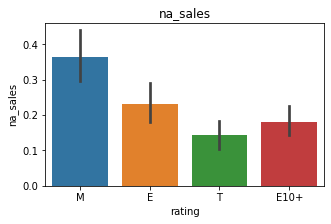

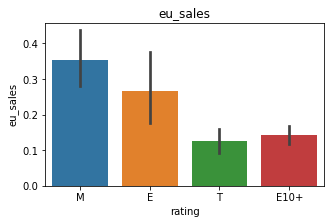

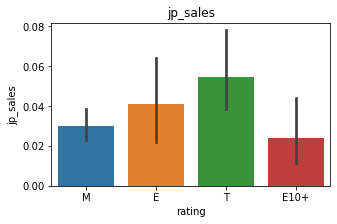

In [57]:
for i in list:
    plt.figure(figsize=(5, 3))
    sns.barplot(x="rating", y=i, data=df2014)
    plt.title(i)
    plt.show()

Видим, что продажи в зависимости от рейтинга ESRB в Америке и Европе похожи друг на друга.\
Больше всего дохода приносят игры для взрослых, на втором месте - для всех, на третьем - для всех от 10.\
Япония же отличается принципиально - здесь на первом месте игры для подростков, на втором - для всех, и лишь на третьем - для взрослых.

#### Итог по разделу
Мы выяснили, что:
- характерный срок возникновения и исчезновения платформы **10 лет**
- жизненный цифл платформы последние годы, как правило, таков: **1-2 год - вывод на рынок, 2-7 годы - рост и зрелость, далее упадок**
- ни одна из платформ не находится на этапе роста. перспективно прибыльными (но уже на стадии стагнации) можно считать (PS4, 3DS, XOne, WiiU, PSV
- из них мы выбрали 4 с самыми большими продажами: **PS4, 3DS, XOne, WiiU**. рекомендуем в 2017 вкладываться в них
- продажи зависят от оценки критиков, чем выше оценка, тем 
- самый прибыльный жанр - **стрелялки**, на 2 месте - **спорт**, 3 место у **платформеров**
- продажи в зависимости от рейтинга ESRB в Америке и Европе похожи друг на друга (больше всего дохода приносят **игры для взрослых**, на втором месте - **для всех**, на третьем - **для всех от 10**)
- Япония же отличается принципиально - здесь на первом месте **игры для подростков**, на втором - **для всех**, и лишь на третьем - **для взрослых**
- oбщая для Америки, Европы и Японии популярная платформа - PS4, она же топ-1 в Америке и Европе
- платформа №1 в Японии 3DS
- в Америке, Европе и Японии в топе экшн-игры, стрелять любят только в Америке и Европе, в Японии же любят ролевые игры.

### 4. Проверка гипотез

Изучим различия между оценками пользователей разных платформ и жанров.

Посмотрим, какова средняя оценка пользователей на каждой платформе.

In [58]:
df2014.groupby('platform')['user_score'].mean()

platform
3DS     7.005314
PC      6.300542
PS3     6.107480
PS4     6.874544
PSP     8.100000
PSV     7.535542
Wii     5.463889
WiiU    7.102830
X360    5.810638
XOne    6.675353
Name: user_score, dtype: float64

Средняя оценка платформы PC (6.3) отличается от XOne (6.7).\
Чтобы поверить, насколько значимо это отличие, воспользуемся статистическими методами.

- **Нулевая гипотеза (Ho) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Альтернативная гипотеза (H1) - средние рейтинги платформ Xbox One и PC разные.**

Сначала оценим размер выборок.

In [59]:
XOne = df2014.query('platform == "XOne" and user_score.isna() == False')['user_score']
PC = df2014.query('platform == "PC" and user_score.isna() == False')['user_score']
print('Размер выборки по XOne:', XOne.shape[0])
print('Размер выборки по PC:', PC.shape[0])

Размер выборки по XOne: 189
Размер выборки по PC: 123


Выборки не маленькие, но на всякий случай проверим их на нормальность.\
Воспользуемся функцией, которая проверяет нулевую гипотезу о том, что выборка происходит из нормального распределения.\
Она основана на тесте Д'Агостино и Пирсона, который сочетает асимметрию и эксцесс, чтобы создать комплексный критерий нормальности.

Здесь и далее примем пороговое значение alpha = 0.01.\
Потому что 99% результата обычно с лихвой достаточно.

In [60]:
alpha = .01

In [61]:
#Напишем функцию для сравнения pvalue c alpha:
def p_alpha(pvalue, alpha):
    print('p-значение:', pvalue)
    if pvalue > alpha:
        print("Не получилось отвергнуть нулевую гипотезу")
    else: print("Отвергаем нулевую гипотезу")

Проверим на нормальность выборку по XOne

In [62]:
p = st.normaltest(XOne)
pvalue = p[1]
p_alpha(pvalue, alpha)

p-значение: 2.6354001691309846e-06
Отвергаем нулевую гипотезу


Проверим на нормальность выборку по PC

In [63]:
p = st.normaltest(PC)
pvalue = p[1]
p_alpha(pvalue, alpha)

p-значение: 0.005554612943155825
Отвергаем нулевую гипотезу


Итого - выборки ненормальны. При этом они независимы, и их 2. Пoэтому для проверки равенства средних воспользуемся тестом Манна-Уитни.

In [64]:
p = st.mannwhitneyu(XOne, PC, alternative = 'two-sided')
pvalue = p[1]
p_alpha(pvalue, alpha)

p-значение: 0.09892810278812585
Не получилось отвергнуть нулевую гипотезу


**Итак**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Различие статистически незначимо.

А теперь посмотрим, каковы средние пользовательские рейтинги жанров.

In [65]:
df2014.groupby('genre')['user_score'].mean()

genre
Action          6.789049
Adventure       7.131897
Fighting        7.075000
Misc            7.012245
Platform        6.575758
Puzzle          7.975000
Racing          6.334722
Role-Playing    7.396992
Shooter         6.548246
Simulation      6.578000
Sports          5.186972
Strategy        7.263158
Name: user_score, dtype: float64

Средние пользовательский рейтинг жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\
Но насколько разные?\
Снова воспользуемся статистическими методами.

**Нулевая гипотеза(H0): cредние пользовательские рейтинги жанров Action и Sports одинаковые.\
Альтернaтивная гипотеза(H1): cредние пользовательские рейтинги жанров Action и Sports разные.**

In [66]:
#Оценим размеры выборок
Action = df2014.query('genre == "Action" and user_score.isna() == False')['user_score']
Sports = df2014.query('genre == "Sports" and user_score.isna() == False')['user_score']
print('Размер выборки по Action:', Action.shape[0])
print('Размер выборки по Sports:', Sports.shape[0])

Размер выборки по Action: 347
Размер выборки по Sports: 142


Проверим на нормальность выборку Action

In [67]:
p = st.normaltest(Action)
pvalue = p[1]
p_alpha(pvalue, alpha)

p-значение: 2.3054426182596484e-15
Отвергаем нулевую гипотезу


Проверим на нормальность выборку Sports

In [68]:
p = st.normaltest(Sports)
pvalue = p[1]
p_alpha(pvalue, alpha)

p-значение: 0.09237820266439485
Не получилось отвергнуть нулевую гипотезу


Итого - Action ненормальна, а Sports нормальна. t-test все равно использовать нежелательно.\
Воспользуемся опять тестом Манна-Уитни.

In [69]:
p = st.mannwhitneyu(Action, Sports, alternative = 'two-sided')
pvalue = p[1]
p_alpha(pvalue, alpha)

p-значение: 2.7547622958201877e-20
Отвергаем нулевую гипотезу


**Итак**: cредние пользовательские рейтинги жанров Action и Sports разныe

#### Итог по разделу
Мы выяснили, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- cредние пользовательские рейтинги жанров Action и Sports разные

### 5. Общий вывод

Вынесем сюда важные для бизнеса выводы:
- характерный срок возникновения и исчезновения платформы **10 лет**
- жизненный цифл платформы последние годы, как правило, таков: **1-2 год - вывод на рынок, 2-7 годы - рост и зрелость, далее упадок**
- ни одна из исследуемых платформ не находится на этапе роста
- перспективно прибыльными платформами являются: **PS4, 3DS, XOne, WiiU**. рекомендуем в 2017 вкладываться в них
- продажи зависят от оценки критиков, причем на высоких оценках даже незначительное увеличение оценки ведет к значительному увеличению продаж
- самый прибыльный жанр - **стрелялки**, на 2 месте - **спорт**, 3 место у **платформеров**
- продажи в зависимости от рейтинга ESRB в Америке и Европе похожи друг на друга (больше всего дохода приносят **игры для взрослых**, на втором месте - **для всех**, на третьем - **для всех от 10**)
- Япония же отличается принципиально - здесь на первом месте **игры для подростков**, на втором - **для всех**, и лишь на третьем - **для взрослых**
- oбщая для Америки, Европы и Японии популярная платформа - PS4, она же топ-1 в Америке и Европе
- платформа №1 в Японии 3DS
- в Америке, Европе и Японии в топе Action, стрелять любят только в Америке и Европе, в Японии же любят ролевые игры.